In [1]:
%load_ext autoreload


In [2]:
%autoreload 2


In [3]:
import crawto.ml_analysis as ca
import pandas as pd
db_name = "test.db" 
problem = "classification" 
target = "Survived" 


In [4]:
untransformed_df, imputed_df,transformed_df,train_target_column, valid_target_column = ca.load_dfs(db_name)


In [5]:
df_list = {"untransformed":untransformed_df,"imputed":imputed_df,"transformed":transformed_df}


In [6]:
ca.nan_report(untransformed_df)


,Percent of data encoded NAN
Cabin,76.80
Age,21.11
Embarked,0.15
PassengerId,0.00
Survived,0.00
Pclass,0.00
Name,0.00
Sex,0.00
SibSp,0.00
Parch,0.00


In [7]:
ca.skew_report(untransformed_df)


There are 2 highly skewed data columns.
Please check them for miscoded na's
['SibSp', 'Fare']


In [8]:
numeric_features, categoric_features = ca.get_feature_lists(db_name)

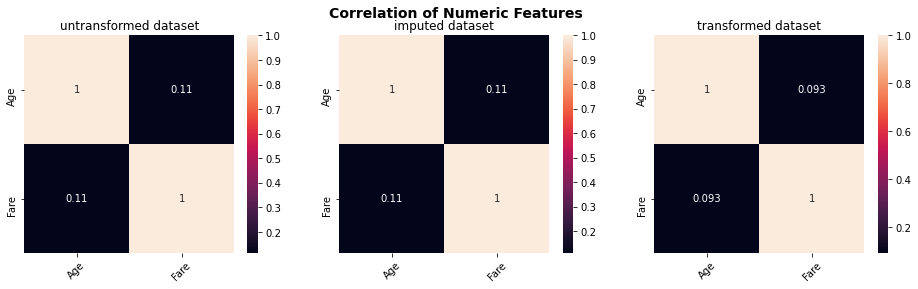

In [9]:
ca.correlation_report(df_list,numeric_features,db_name)


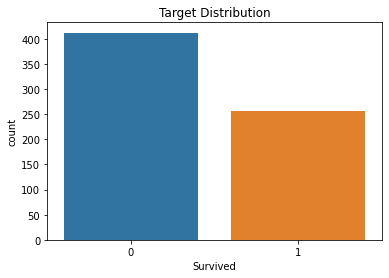

In [10]:
ca.target_distribution_report(problem=problem,df=untransformed_df,target=target)


e:\projects\crawto\.test-env\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
e:\projects\crawto\.test-env\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
e:\projects\crawto\.test-env\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


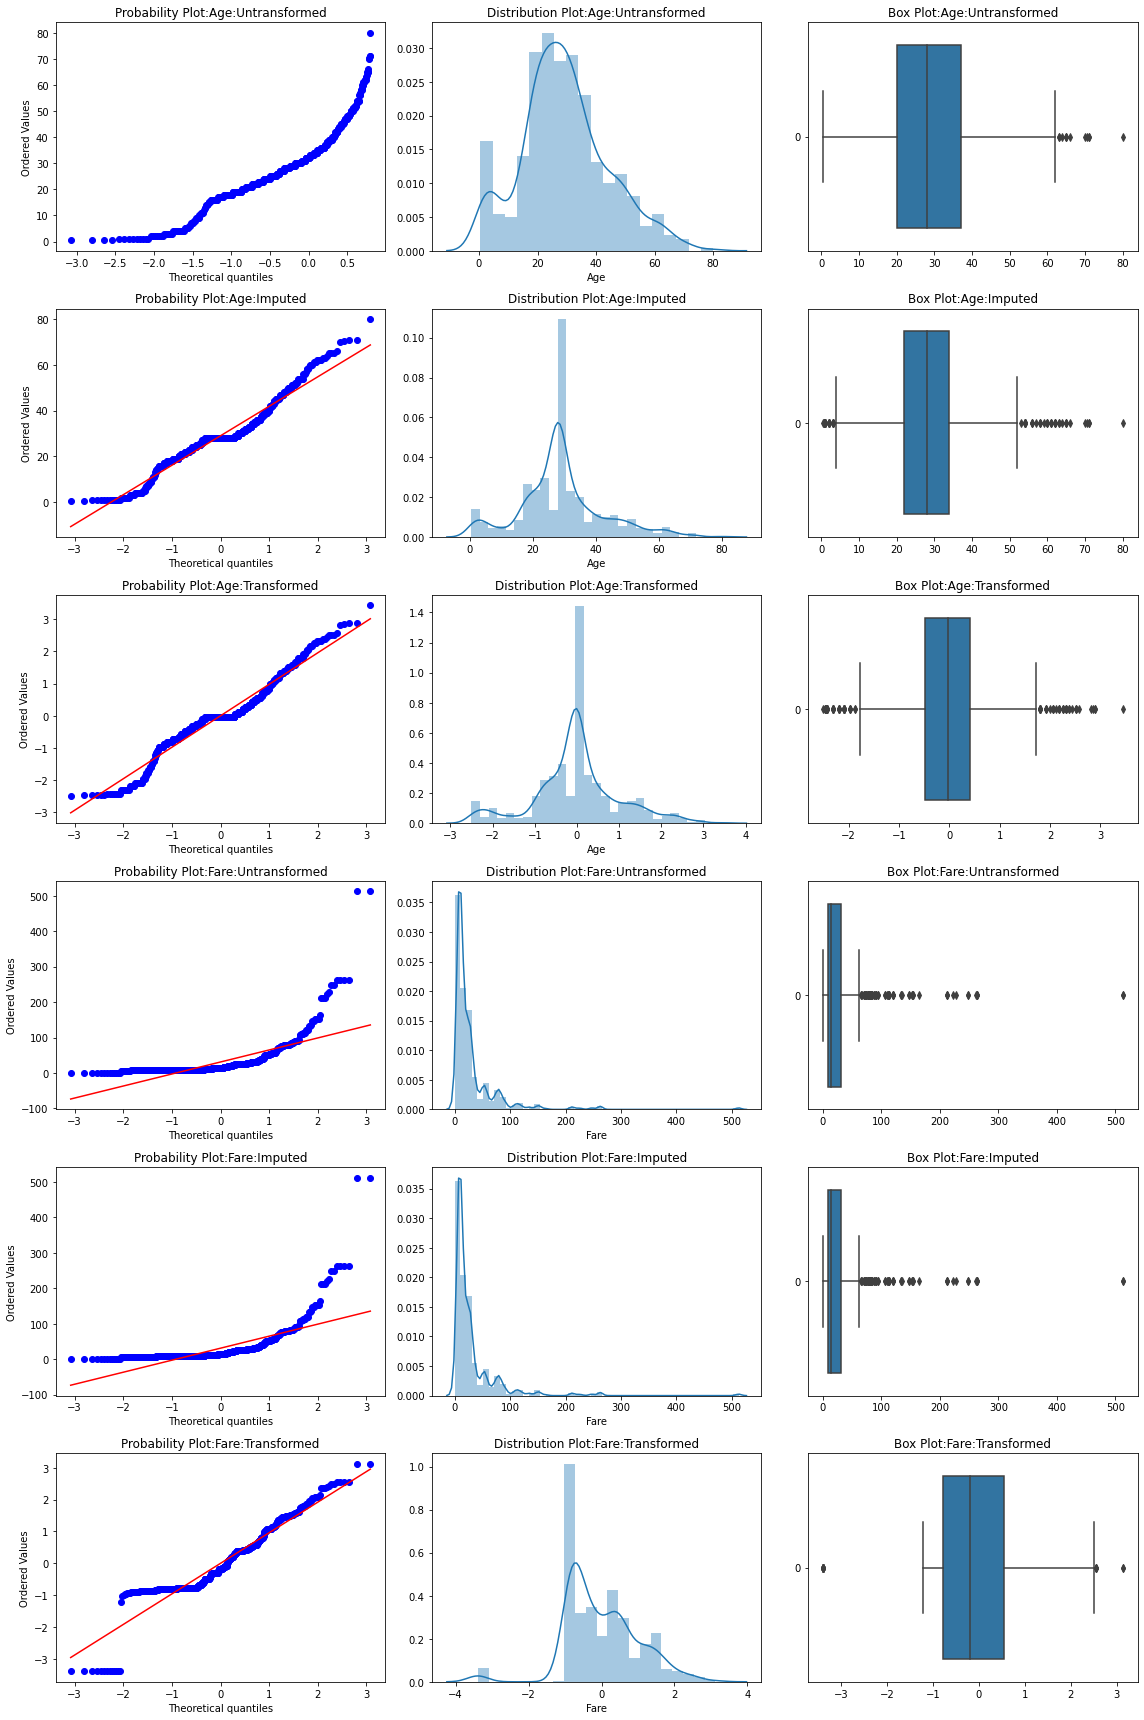

In [11]:
ca.probability_plots(numeric_features,df_list)


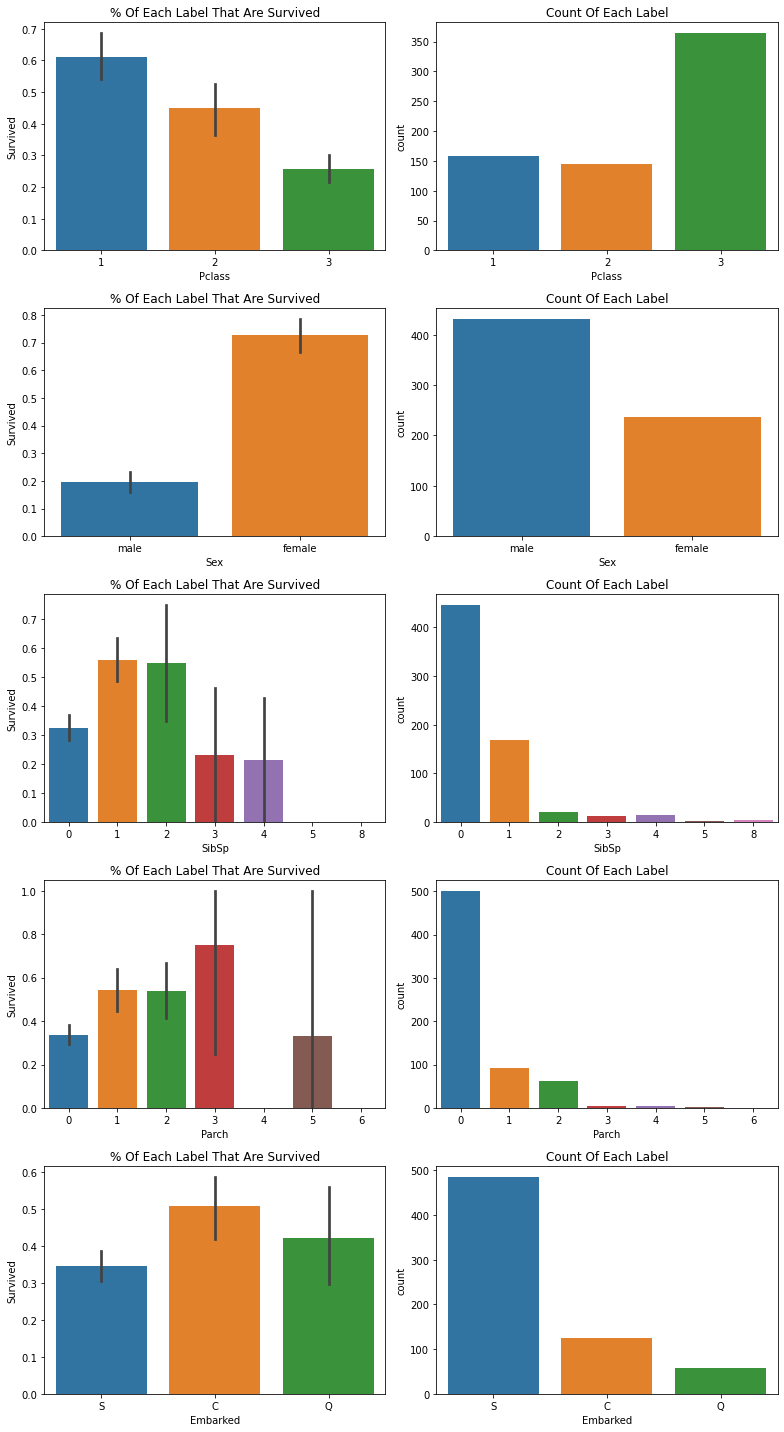

In [12]:
ca.categorical_bar_plots(categorical_features=categoric_features,target=target,data=untransformed_df)


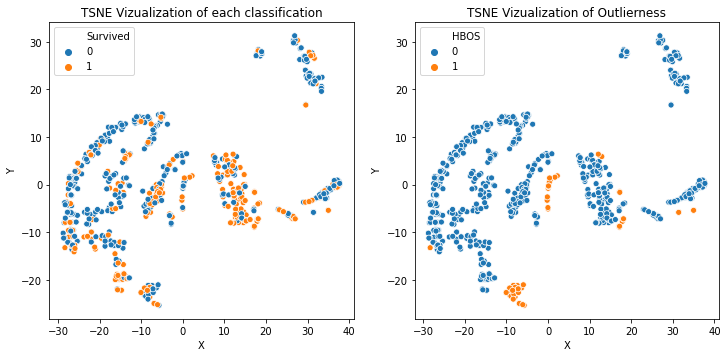

In [13]:
ca.tsne_viz(transformed_df,train_target_column,target,problem)


e:\projects\crawto\.test-env\lib\site-packages\numba\np\ufunc\parallel.py:355: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 11000. The TBB threading layer is disabled.
  warnings.warn(problem)


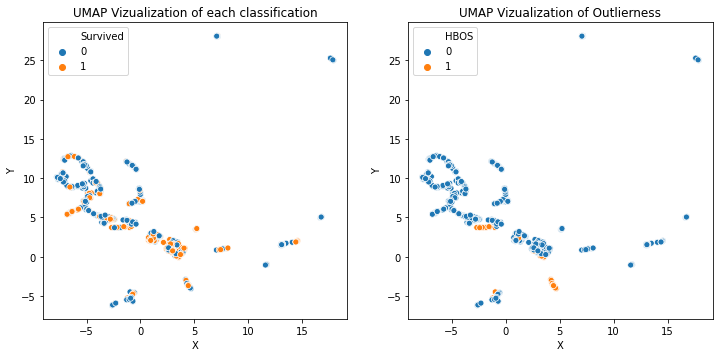

In [14]:
ca.umap_viz(transformed_df,train_target_column,target,problem)


In [ ]:
ca.nca_viz(transformed_df,train_target_column,target,problem)


> e:\projects\crawto\crawto\ml_analysis.py(351)nca_viz()
-> df1 = df.copy()
(Pdb) n
> e:\projects\crawto\crawto\ml_analysis.py(352)nca_viz()
-> df1 = df1.values.astype(np.float32)
(Pdb) df
       Pclass       Sex     SibSp     Parch  Embarked       Age      Fare  \
0    0.339130  0.381988  0.389381  0.380054  0.387701  2.120431 -0.253897   
1    0.384615  0.381988  0.499998  0.460000  0.387701 -2.191757  0.581351   
2    0.384615  0.381988  0.389381  0.380054  0.387701 -0.026329 -0.790009   
3    0.455357  0.404494  0.389381  0.380054  0.388235 -0.331093  1.515412   
4    0.384615  0.381988  0.389381  0.380054  0.387701 -0.566118 -0.797326   
..        ...       ...       ...       ...       ...       ...       ...   
663  0.384615  0.381988  0.361345  0.380054  0.387701 -0.807693 -0.975193   
664  0.384615  0.404494  0.389381  0.380054  0.387701 -0.331093 -0.672617   
665  0.384615  0.381988  0.389381  0.385714  0.387701  1.119884 -0.078674   
666  0.384615  0.381988  0.389381  0.4600

(Pdb) df1.head()
*** AttributeError: 'numpy.ndarray' object has no attribute 'head'
(Pdb) 
*** AttributeError: 'numpy.ndarray' object has no attribute 'head'
(Pdb) df1[0]
array([ 0.33913043,  0.38198757,  0.38938054,  0.3800539 ,  0.38770053,
        2.1204305 , -0.25389674,  0.        ,  0.        ,  1.        ,
        0.        ], dtype=float32)
(Pdb) df1.shape
(668, 11)
(Pdb) target_column.shape
(668, 1)


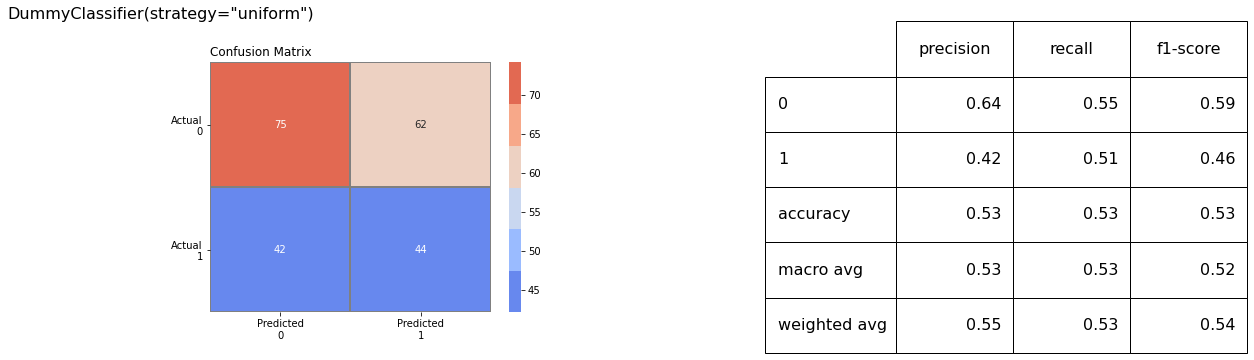

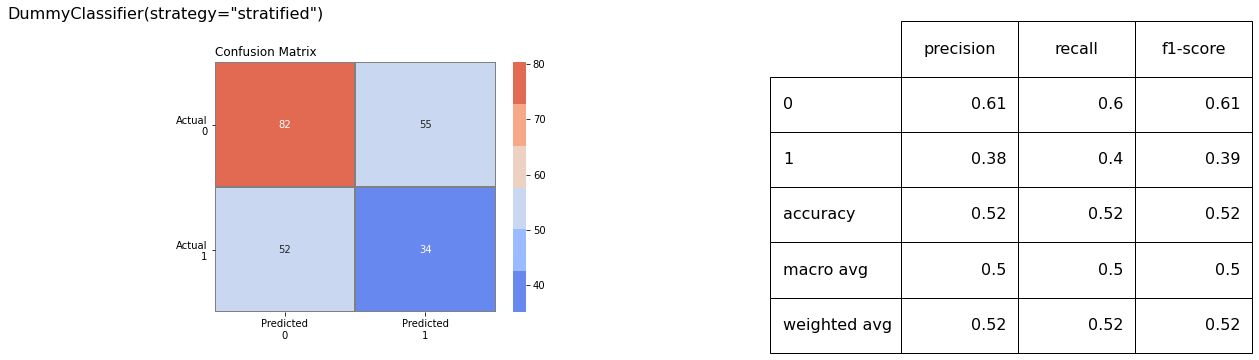

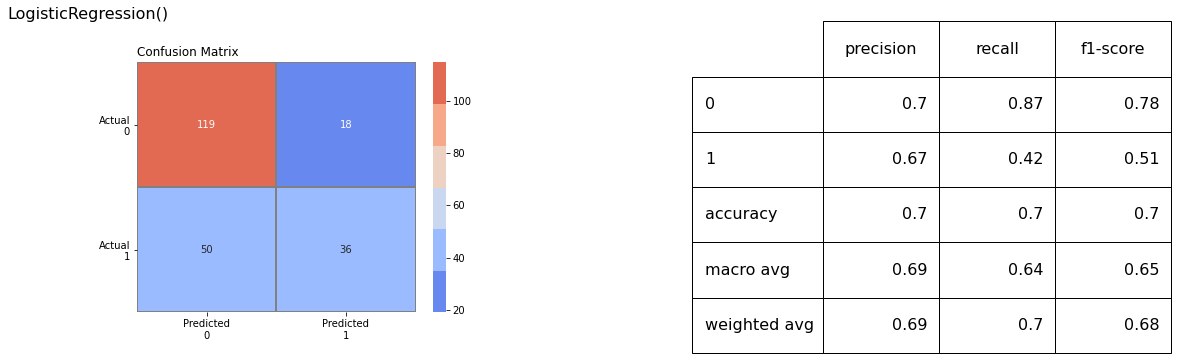

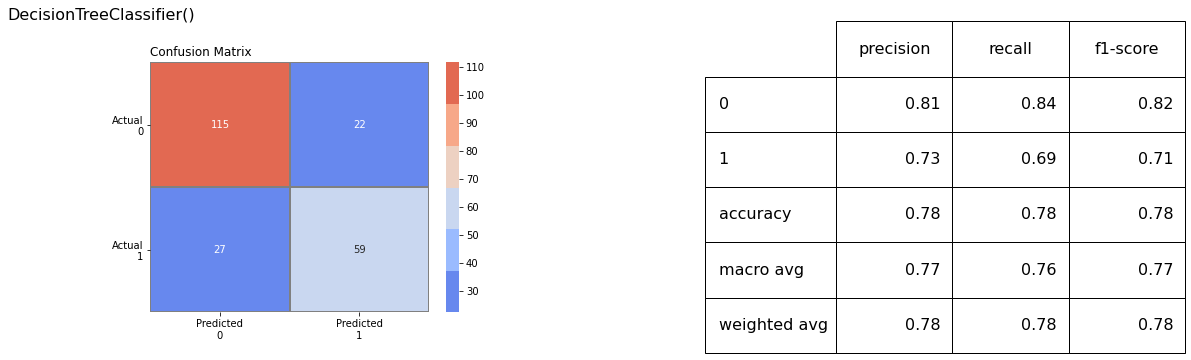

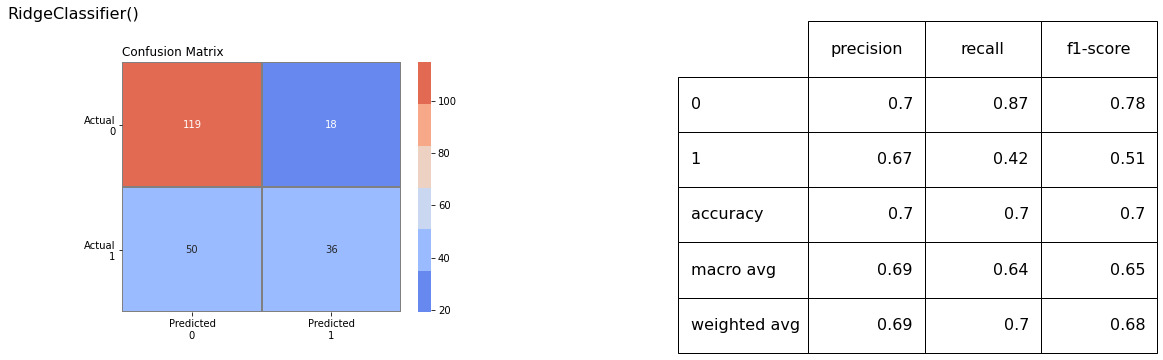

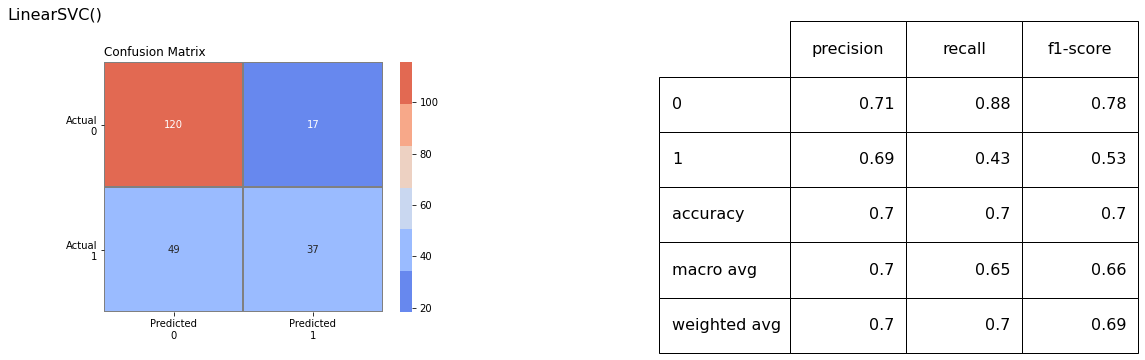

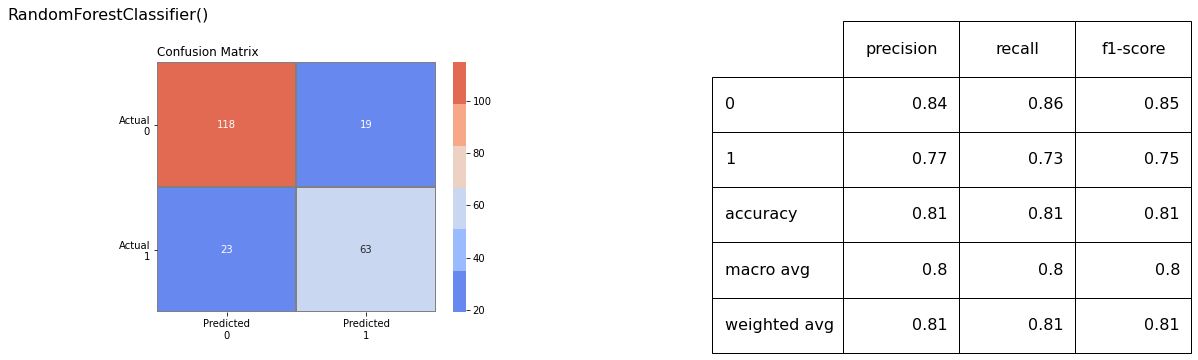

e:\projects\crawto\.test-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


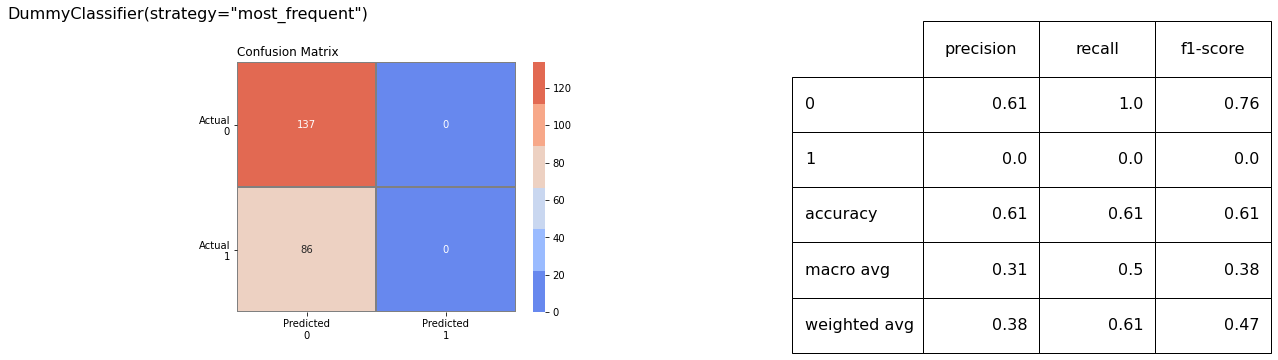

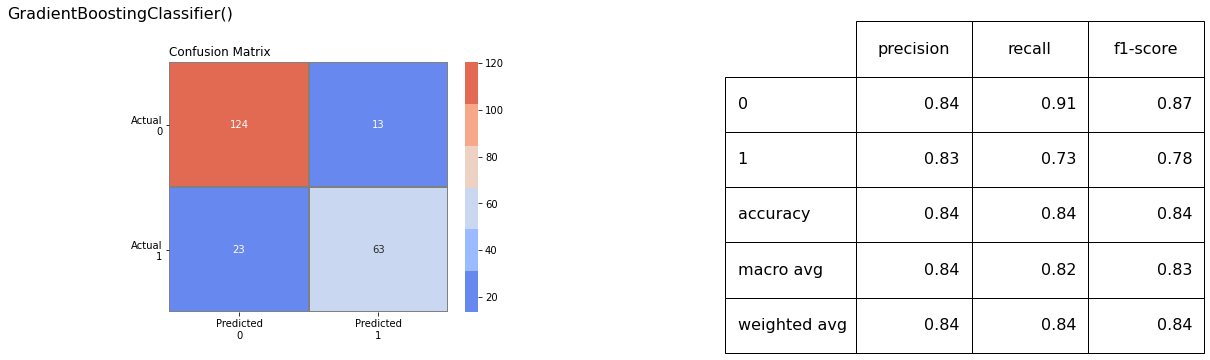

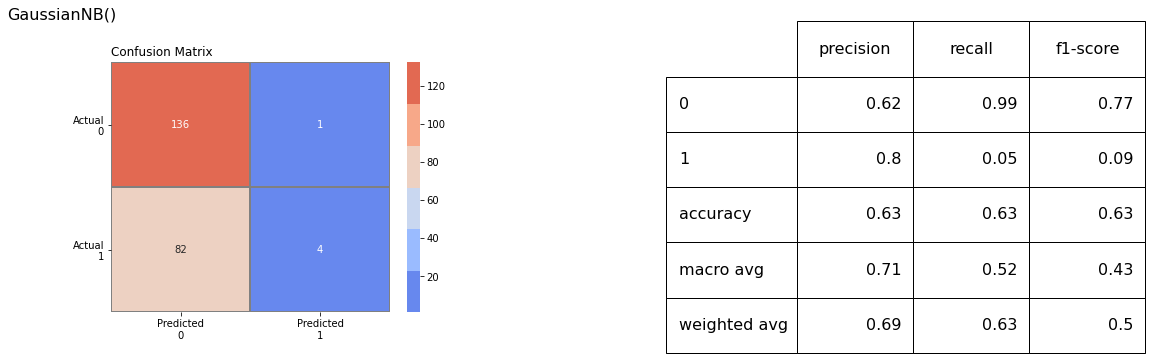

In [16]:
ca.model_viz(db_name,valid_target_column)
